<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/DeepLearning_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras.models import load_model
CNN_glg_drive_path = '/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small_2.h5'

model = load_model(CNN_glg_drive_path)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small/test/cats/cat.1700.jpg
<class 'PIL.Image.Image'>
(150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


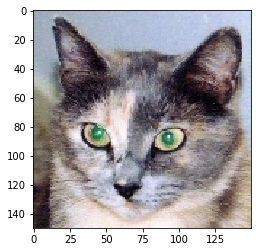

In [6]:
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

#
test_dir = '/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small/test/'
img_file = os.path.join(test_dir,'cats/cat.1700.jpg')
print(img_file)
#
img = image.load_img(img_file,target_size=(150,150))
print(type(img))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255.
print(img_tensor.shape) 
#
plt.imshow(img_tensor[0])

In [0]:
from keras import models
from keras import backend as K


layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model =models.Model(inputs=model.input, outputs= layer_outputs)
activations = activation_model.predict(img_tensor)

In [8]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


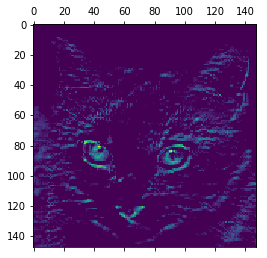

In [9]:
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')